In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, DateFormatter


In [3]:
location = '/Users/varungandhi/Desktop/data_1/'
file_1 = 'Data_ELTE_1min.pkl'
df_1min = pd.read_pickle(location + file_1)


In [4]:
a = 6.11 * 10**((7.5 * df_1min['temp_Avg(1)'])/(237.3 + df_1min['temp_Avg(1)']))
b = 6.11 * 10**((9.5 * df_1min['temp_Avg(1)'])/(265.5 + df_1min['temp_Avg(1)']))
c = 6.11 * 10**((7.5 * df_1min['temp_Avg(2)'])/(237.3 + df_1min['temp_Avg(2)']))
d = 6.11 * 10**((9.5 * df_1min['temp_Avg(2)'])/(265.5 + df_1min['temp_Avg(2)']))

In [25]:
df_1min.columns

Index(['TIMESTAMP', 'RECORD', 'PTemp_Avg', 'Batt_volt_Avg', 'rh_Avg(1)',
       'rh_Avg(2)', 'temp_Avg(1)', 'temp_Avg(2)', 'ws_Std(1)', 'ws_Std(2)',
       'ws_Avg(1)', 'ws_Avg(2)', 'es_1', 'es_2', 'e_1', 'e_2', 'ediff',
       'tdiff', 'bow', 'val_1', 'val_2'],
      dtype='object')

In [5]:
# finding bowen ration between different levels
# using profile data of 1 minutes 
es_1 = []
for i in range(len(df_1min.index)):
    if df_1min['temp_Avg(1)'][i] >= 0:
        es_1.append(6.11 * 10**((7.5 * df_1min['temp_Avg(1)'][i])/(237.3 + df_1min['temp_Avg(1)'][i])))
    else:
        es_1.append(6.11 * 10**((9.5 * df_1min['temp_Avg(1)'][i])/(265.5 + df_1min['temp_Avg(1)'][i])))
    
es_2 = [] 

for i in range(len(df_1min.index)):
    if df_1min['temp_Avg(2)'][i] >= 0:
        es_2.append(6.11 * 10**((7.5 * df_1min['temp_Avg(2)'][i])/(237.3 + df_1min['temp_Avg(2)'][i])))
    else:
        es_2.append(6.11 * 10**((9.5 * df_1min['temp_Avg(2)'][i])/(265.5 + df_1min['temp_Avg(2)'][i])))

In [6]:
df_1min['es_1'] = es_1
df_1min['es_2'] = es_2
df_1min['e_1'] = (df_1min['es_1'] * df_1min['rh_Avg(2)'])/100
df_1min['e_2'] = (df_1min['es_2'] * df_1min['rh_Avg(1)'])/100


In [7]:
df_1min['ediff'] = df_1min['e_2'] - df_1min['e_1']
df_1min['tdiff'] = df_1min['temp_Avg(2)'] - df_1min['temp_Avg(1)']

In [8]:
df_1min['bow'] = 0.66 * (df_1min['tdiff']/df_1min['ediff'])

In [9]:
df_1min['TIMESTAMP'] = pd.to_datetime(df_1min['TIMESTAMP'])

In [10]:
val_1 = []
val_2 = []
for i in range(len(df_1min.index)):
    if df_1min['bow'][i]  > -2 and df_1min['bow'][i] < 2:
        val_1.append(df_1min['bow'][i])
        
    else:
        val_1.append(float('NAN'))
        
for i in range(len(df_1min.index)):
    if df_1min['bow'][i]  > -0.8 and df_1min['bow'][i] < 0.8:
        val_2.append(df_1min['bow'][i])
        
    else:
        val_2.append(float('NAN'))

In [11]:
df_1min['val_1'] = val_1
df_1min['val_2'] = val_2


In [12]:
df_1min.describe()

,RECORD,PTemp_Avg,Batt_volt_Avg,rh_Avg(1),rh_Avg(2),temp_Avg(1),temp_Avg(2),ws_Std(1),ws_Std(2),ws_Avg(1),ws_Avg(2),es_1,es_2,e_1,e_2,ediff,tdiff,bow,val_1,val_2
count,237250.000000,237250.000000,237250.000000,237250.000000,237250.000000,237250.000000,237250.000000,237250.000000,237250.000000,237250.000000,237250.000000,237250.000000,237250.000000,237250.000000,237250.000000,237250.000000,237250.000000,237246.000000,198397.000000,137631.000000
mean,102663.331642,8.803806,13.614085,71.750488,72.241328,4.742847,4.733580,0.489777,0.480753,2.773398,2.072841,9.114521,9.102000,6.158420,6.149681,-0.008739,-0.009267,0.072930,0.484689,0.276861
std,66600.354785,6.762344,0.012659,19.511966,20.845721,5.307154,5.277726,0.384434,0.360301,1.696204,2.104406,3.801162,3.763697,2.015841,2.044500,0.343537,0.360354,256.541580,0.638150,0.296192
min,0.000000,-9.030000,13.580000,21.780000,21.640000,-10.020000,-9.700000,0.000000,0.000000,0.000000,0.000000,2.590887,2.665624,1.518191,1.434014,-1.211991,-0.928000,-83078.517914,-1.999919,-0.799959
25%,42100.250000,4.571000,13.610000,57.600000,56.680000,1.213000,1.210000,0.212000,0.217000,1.568000,1.082000,6.670890,6.669449,4.771725,4.770572,-0.220725,-0.176000,0.236070,0.237131,0.193009
50%,101413.500000,7.552000,13.620000,75.620000,74.970000,3.958000,3.928000,0.380000,0.381000,2.418000,1.763000,8.111175,8.094058,6.088764,6.037159,-0.077528,-0.097000,0.425585,0.379219,0.308264
75%,160725.750000,11.910000,13.620000,89.200000,91.300000,7.658000,7.713000,0.662000,0.652000,3.623000,2.773000,10.483589,10.523033,7.277821,7.219098,0.071493,0.044000,1.158450,0.852960,0.437815
max,220039.000000,37.570000,13.640000,98.000000,101.900000,24.500000,24.000000,12.810000,6.450000,14.180000,777.000000,30.754797,29.847268,16.256005,16.643887,4.305042,2.989000,30112.273564,1.999940,0.799997


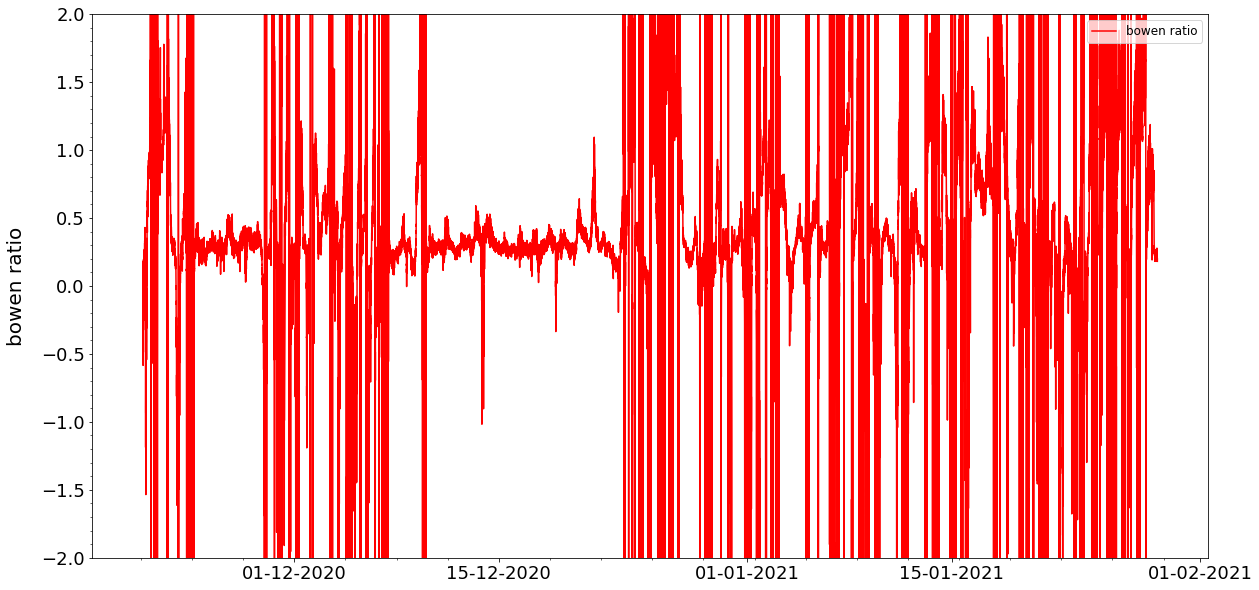

In [14]:
def plotting(data_frame, col1,col2, r1,r2,col,label):
    
    
    fig,ax = plt.subplots(1,1,figsize = (20,10))
         
    ax.plot(data_frame[col1][r1:r2],data_frame[col2][r1:r2], label = label, color = col)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.tick_params(axis='both', which='minor', labelsize=8)
    ax.tick_params(axis='x', labelrotation= 0)
        
    
    
    #axis parameters
    ax.set_ylim([-2,2])
    #ax.set_yticks(np.arange(-10,10.1,1))
    ax.legend(loc= 'upper right', prop={'size': 12}, ncol = 5)
    ax.set_ylabel(label, fontsize=20, labelpad =15 )
    ax.minorticks_on()
    ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y"))


plotting(df_1min,'TIMESTAMP', 'bow', r1 = 0, r2 = 100000,col = 'red',label = 'bowen ratio')

In [15]:
bow = pd.concat([df_1min['TIMESTAMP'], df_1min['bow'],df_1min['val_1'], df_1min['val_2']], axis = 1)

In [16]:
bow = bow.resample('30min', on = 'TIMESTAMP', closed = 'right').mean()
bow.reset_index(inplace= True)

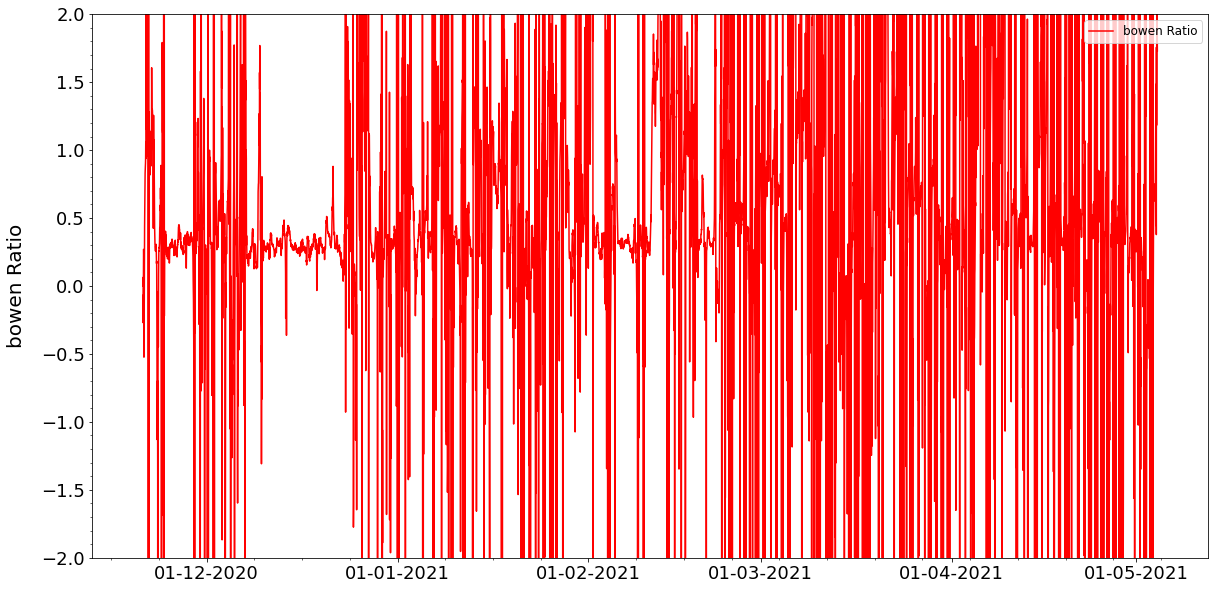

In [17]:


plotting(data_frame= bow, col1= 'TIMESTAMP', col2='bow', col='red',r1 = 0 ,r2= 7910,label='bowen Ratio' )


In [18]:
bow['val_1'].isna().sum()

341

In [19]:
bow['val_2'].isna().sum()

2412

In [20]:
bow.describe()

,bow,val_1,val_2
count,7910.000000,7569.000000,5498.000000
mean,0.073115,0.493918,0.250078
std,46.914428,0.732250,0.356411
min,-2775.614469,-1.998330,-0.790086
25%,0.232798,0.219693,0.128949
50%,0.413809,0.389326,0.305275
75%,1.150572,0.968468,0.460840
max,1001.651075,1.999873,0.799881


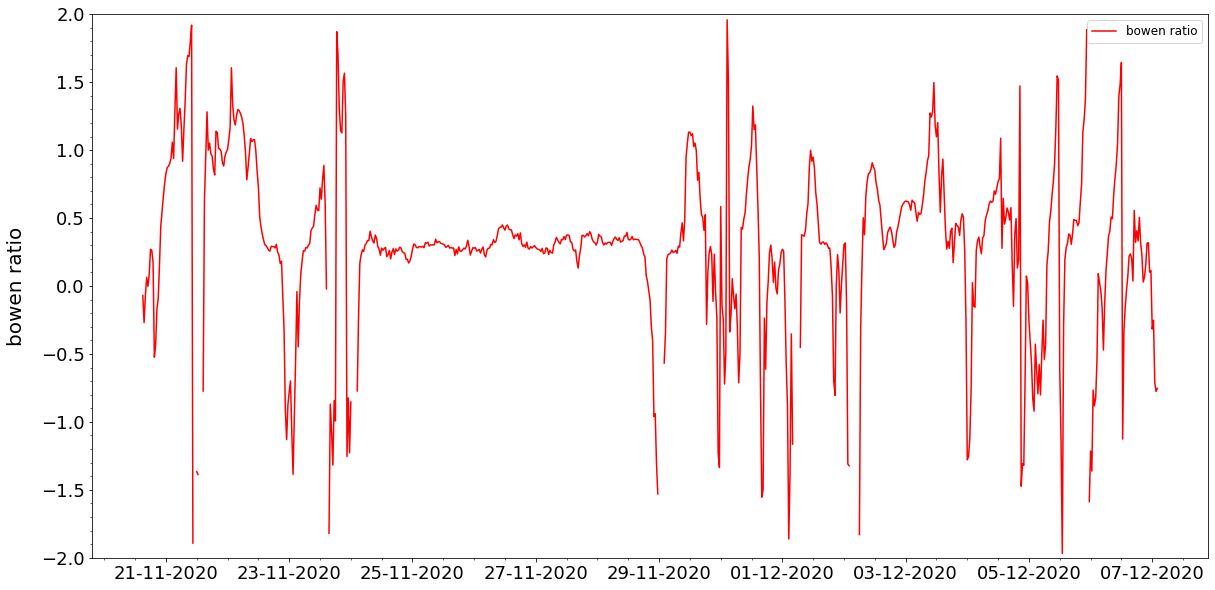

In [21]:
plotting(bow, col1= 'TIMESTAMP', col2= 'val_1', r1=0, r2= 791, col='red', label='bowen ratio')

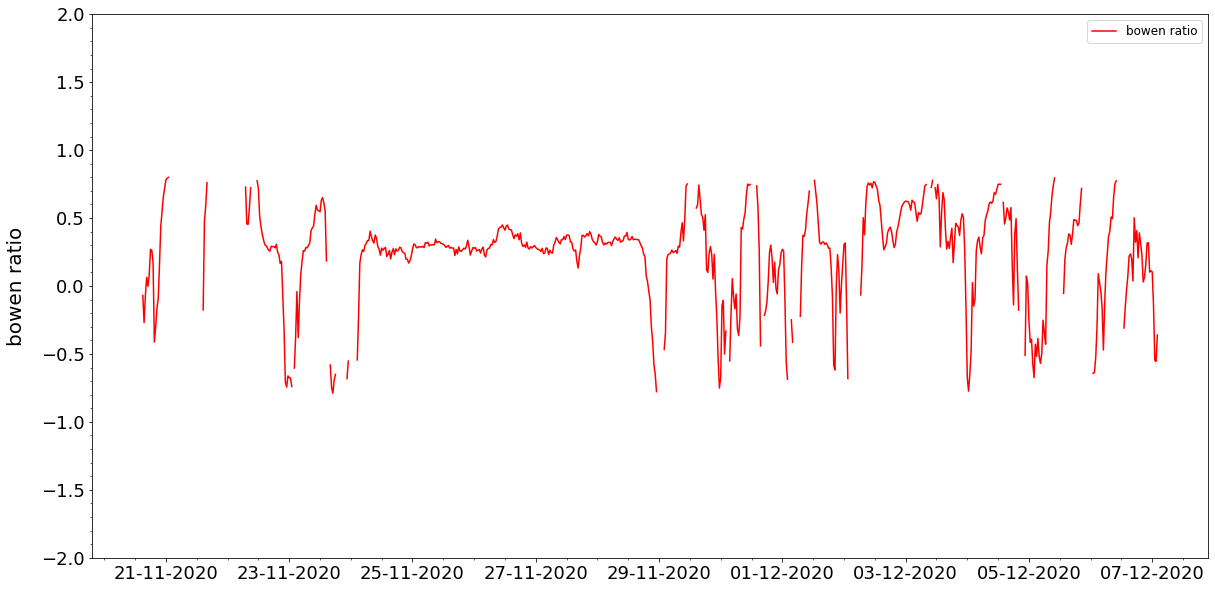

In [22]:
plotting(bow, col1= 'TIMESTAMP', col2= 'val_2', r1=0, r2= 791, col='red', label='bowen ratio')

In [23]:
bow

,TIMESTAMP,bow,val_1,val_2
0,2020-11-20 15:00:00,-0.069926,-0.069926,-0.069926
1,2020-11-20 15:30:00,-0.269355,-0.269355,-0.269355
2,2020-11-20 16:00:00,-0.073047,-0.073047,-0.073047
3,2020-11-20 16:30:00,0.063623,0.063623,0.063623
4,2020-11-20 17:00:00,-0.001924,-0.001924,-0.001924
...,...,...,...,...
7905,2021-05-04 07:30:00,2.161675,1.654677,0.788892
7906,2021-05-04 08:00:00,1.871514,1.601814,NaN
7907,2021-05-04 08:30:00,2.062320,1.648583,NaN
7908,2021-05-04 09:00:00,1.824421,1.640860,NaN


In [26]:
df_10sec = pd.read_csv('/Users/varungandhi/Desktop/data_1/DATA_ELTE_10sec.txt', sep = ';')

In [27]:
# finding bowen ration between different levels
# using profile data of 1 minutes 
es_10 = []
for i in range(len(df_10sec.index)):
    if df_10sec['temp_Avg(1) (SUM)'][i] >= 0:
        es_10.append(6.11 * 10**((7.5 * df_10sec['temp_Avg(1) (SUM)'][i])/(237.3 + df_10sec['temp_Avg(1) (SUM)'][i])))
    else:
        es_10.append(6.11 * 10**((9.5 * df_10sec['temp_Avg(1) (SUM)'][i])/(265.5 + df_10sec['temp_Avg(1) (SUM)'][i])))
    
es_20 = [] 

for i in range(len(df_10sec.index)):
    if df_10sec['temp_Avg(2) (SUM)'][i] >= 0:
        es_20.append(6.11 * 10**((7.5 * df_10sec['temp_Avg(2) (SUM)'][i])/(237.3 + df_10sec['temp_Avg(2) (SUM)'][i])))
    else:
        es_20.append(6.11 * 10**((9.5 * df_10sec['temp_Avg(2) (SUM)'][i])/(265.5 + df_10sec['temp_Avg(2) (SUM)'][i])))

In [28]:
df_10sec['es_10'] = es_10
df_10sec['es_20'] = es_20
df_10sec['e_10'] = (df_10sec['es_10'] * df_10sec['rh_Avg(1) (SUM)'])/100
df_10sec['e_20'] = (df_10sec['es_20'] * df_10sec['rh_Avg(2) (SUM)'])/100


In [29]:
df_10sec['ediff'] = df_10sec['e_10'] - df_10sec['e_20']
df_10sec['tdiff'] = df_10sec['temp_Avg(1) (SUM)'] - df_10sec['temp_Avg(2) (SUM)']

In [30]:
df_10sec['bow'] = 0.66 * (df_10sec['tdiff']/df_10sec['ediff'])
df_10sec['TIMESTAMP'] = pd.to_datetime(df_10sec['TIMESTAMP'])

In [31]:
val_1 = []
val_2 = []
for i in range(len(df_10sec.index)):
    if df_10sec['bow'][i]  > -2 and df_10sec['bow'][i] < 2:
        val_1.append(df_10sec['bow'][i])
        
    else:
        val_1.append(float('NAN'))
        
for i in range(len(df_10sec.index)):
    if df_10sec['bow'][i]  > -0.8 and df_10sec['bow'][i] < 0.8:
        val_2.append(df_10sec['bow'][i])
        
    else:
        val_2.append(float('NAN'))

In [32]:
df_10sec['val_1'] = val_1
df_10sec['val_2'] = val_2
df_10sec.describe()

,Batt_volt_Avg (SUM),PTemp_Avg (SUM),RECORD (SUM),rh_Avg(1) (SUM),rh_Avg(2) (SUM),temp_Avg(1) (SUM),temp_Avg(2) (SUM),ws_Avg(1) (SUM),ws_Avg(2) (SUM),es_10,es_20,e_10,e_20,ediff,tdiff,bow,val_1,val_2
count,1.423489e+06,1.423489e+06,1.423489e+06,1.423489e+06,1.423489e+06,1.423489e+06,1.423489e+06,1.423489e+06,1.423489e+06,1.423489e+06,1.423489e+06,1.423489e+06,1.423489e+06,1.423489e+06,1.423489e+06,1.423330e+06,1.028645e+06,655624.000000
mean,1.361400e+01,8.801833e+00,6.159682e+05,7.175087e+01,7.224164e+01,4.740753e+00,4.731504e+00,2.773306e+00,2.069396e+00,9.113213e+00,9.100712e+00,6.148255e+00,6.154490e+00,-6.234987e-03,9.248903e-03,-2.251205e-01,-1.738378e-02,-0.136215
std,1.267789e-02,6.762938e+00,3.995955e+05,1.951236e+01,2.084592e+01,5.306654e+00,5.277266e+00,1.766725e+00,1.456553e+00,3.801124e+00,3.763685e+00,2.033695e+00,2.013888e+00,1.616145e-01,3.605691e-01,4.483469e+02,8.770751e-01,0.448333
min,1.357000e+01,-9.030000e+00,0.000000e+00,2.151000e+01,2.145000e+01,-1.003000e+01,-9.710000e+00,0.000000e+00,0.000000e+00,2.588582e+00,2.663259e+00,1.467050e+00,1.450054e+00,-1.298439e+00,-3.000000e+00,-1.596613e+05,-1.999980e+00,-0.799996
25%,1.361000e+01,4.570000e+00,2.525930e+05,5.760000e+01,5.668000e+01,1.210000e+00,1.200000e+00,1.540000e+00,1.040000e+00,6.669449e+00,6.664646e+00,4.779959e+00,4.783289e+00,-1.420902e-01,-5.000000e-02,-7.506544e-01,-5.979177e-01,-0.506234
50%,1.362000e+01,7.550000e+00,6.084670e+05,7.562000e+01,7.497000e+01,3.950000e+00,3.920000e+00,2.390000e+00,1.730000e+00,8.106607e+00,8.089499e+00,6.040800e+00,6.082238e+00,-9.581782e-03,1.000000e-01,-1.444570e-01,-2.057944e-01,-0.265543
75%,1.362000e+01,1.191000e+01,9.643390e+05,8.920000e+01,9.130000e+01,7.650000e+00,7.710000e+00,3.610000e+00,2.760000e+00,1.047786e+01,1.052088e+01,7.225727e+00,7.260990e+00,1.094509e-01,1.800000e-01,1.097623e+00,6.329219e-01,0.238551
max,1.364000e+01,3.757000e+01,1.320213e+06,9.800000e+01,1.019000e+02,2.451000e+01,2.402000e+01,1.760000e+01,1.529000e+01,3.077319e+01,2.988312e+01,1.651063e+01,1.638432e+01,3.268060e+00,9.600000e-01,1.885929e+05,1.999970e+00,0.799997


In [33]:
#bow_10sec = pd.concat([df_10sec['TIMESTAMP'], df_10sec['bow'],df_10sec['val_1'], df_10sec['val_2']], axis = 1)
#bow_10sec = bow.resample('30min', on = 'TIMESTAMP', closed = 'right').mean()
#bow_10sec.reset_index(inplace= True)

In [34]:
df_10sec.describe()

,Batt_volt_Avg (SUM),PTemp_Avg (SUM),RECORD (SUM),rh_Avg(1) (SUM),rh_Avg(2) (SUM),temp_Avg(1) (SUM),temp_Avg(2) (SUM),ws_Avg(1) (SUM),ws_Avg(2) (SUM),es_10,es_20,e_10,e_20,ediff,tdiff,bow,val_1,val_2
count,1.423489e+06,1.423489e+06,1.423489e+06,1.423489e+06,1.423489e+06,1.423489e+06,1.423489e+06,1.423489e+06,1.423489e+06,1.423489e+06,1.423489e+06,1.423489e+06,1.423489e+06,1.423489e+06,1.423489e+06,1.423330e+06,1.028645e+06,655624.000000
mean,1.361400e+01,8.801833e+00,6.159682e+05,7.175087e+01,7.224164e+01,4.740753e+00,4.731504e+00,2.773306e+00,2.069396e+00,9.113213e+00,9.100712e+00,6.148255e+00,6.154490e+00,-6.234987e-03,9.248903e-03,-2.251205e-01,-1.738378e-02,-0.136215
std,1.267789e-02,6.762938e+00,3.995955e+05,1.951236e+01,2.084592e+01,5.306654e+00,5.277266e+00,1.766725e+00,1.456553e+00,3.801124e+00,3.763685e+00,2.033695e+00,2.013888e+00,1.616145e-01,3.605691e-01,4.483469e+02,8.770751e-01,0.448333
min,1.357000e+01,-9.030000e+00,0.000000e+00,2.151000e+01,2.145000e+01,-1.003000e+01,-9.710000e+00,0.000000e+00,0.000000e+00,2.588582e+00,2.663259e+00,1.467050e+00,1.450054e+00,-1.298439e+00,-3.000000e+00,-1.596613e+05,-1.999980e+00,-0.799996
25%,1.361000e+01,4.570000e+00,2.525930e+05,5.760000e+01,5.668000e+01,1.210000e+00,1.200000e+00,1.540000e+00,1.040000e+00,6.669449e+00,6.664646e+00,4.779959e+00,4.783289e+00,-1.420902e-01,-5.000000e-02,-7.506544e-01,-5.979177e-01,-0.506234
50%,1.362000e+01,7.550000e+00,6.084670e+05,7.562000e+01,7.497000e+01,3.950000e+00,3.920000e+00,2.390000e+00,1.730000e+00,8.106607e+00,8.089499e+00,6.040800e+00,6.082238e+00,-9.581782e-03,1.000000e-01,-1.444570e-01,-2.057944e-01,-0.265543
75%,1.362000e+01,1.191000e+01,9.643390e+05,8.920000e+01,9.130000e+01,7.650000e+00,7.710000e+00,3.610000e+00,2.760000e+00,1.047786e+01,1.052088e+01,7.225727e+00,7.260990e+00,1.094509e-01,1.800000e-01,1.097623e+00,6.329219e-01,0.238551
max,1.364000e+01,3.757000e+01,1.320213e+06,9.800000e+01,1.019000e+02,2.451000e+01,2.402000e+01,1.760000e+01,1.529000e+01,3.077319e+01,2.988312e+01,1.651063e+01,1.638432e+01,3.268060e+00,9.600000e-01,1.885929e+05,1.999970e+00,0.799997


In [35]:
file_2 = 'Data_BME_garden.pkl'
bme_garden = pd.read_pickle(location + file_2)

In [36]:
bme_garden.columns[100:]

Index(['wind_speed_2_Std', 'wind_direction_2_Min', 'wind_direction_2_TMn',
       'wind_direction_2_Max', 'wind_direction_2_TMx', 'wind_direction_2_Std'],
      dtype='object')

In [37]:
bme_garden

,TIMESTAMP_UTC+2,TIMESTAMP_UTC,RECORD,kohms_Avg,AirTC_1_Avg,RH_1_orig,RH_1_corr,RH1_corr_cut,AirTC_2_Avg,RH_2,...,wind_speed_2_Min,wind_speed_2_TMn,wind_speed_2_Max,wind_speed_2_TMx,wind_speed_2_Std,wind_direction_2_Min,wind_direction_2_TMn,wind_direction_2_Max,wind_direction_2_TMx,wind_direction_2_Std
0,2020-11-20 18:22:00,2020-11-20 16:22:00,0.0,7999.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2020-11-20 18:22:00,NaN,2020-11-20 18:22:00,NaN,NaN,2020-11-20 18:22:00,NaN,2020-11-20 18:22:00,NaN
1,2020-11-20 18:23:00,2020-11-20 16:23:00,1.0,7999.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2020-11-20 18:23:00,NaN,2020-11-20 18:23:00,NaN,NaN,2020-11-20 18:23:00,NaN,2020-11-20 18:23:00,NaN
2,2020-11-20 18:24:00,2020-11-20 16:24:00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2020-11-20 18:24:00,NaN,2020-11-20 18:24:00,NaN,NaN,2020-11-20 18:24:00,NaN,2020-11-20 18:24:00,NaN
3,2020-11-20 18:25:00,2020-11-20 16:25:00,3.0,7999.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2020-11-20 18:25:00,NaN,2020-11-20 18:25:00,NaN,NaN,2020-11-20 18:25:00,NaN,2020-11-20 18:25:00,NaN
4,2020-11-20 18:26:00,2020-11-20 16:26:00,4.0,7999.0,NaN,51.45,51.45,51.45,NaN,52.28,...,NaN,2020-11-20 18:25:58,NaN,2020-11-20 18:25:58,NaN,NaN,2020-11-20 18:25:58,NaN,2020-11-20 18:25:58,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237264,2021-05-04 12:46:00,2021-05-04 10:46:00,237247.0,-7999.0,18.09,36.57,36.57,36.57,18.62,36.43,...,0.88,2021-05-04 12:45:37,6.63,2021-05-04 12:45:55,1.523,138.0,2021-05-04 12:45:10,249.0,2021-05-04 12:45:26,24.91
237265,2021-05-04 12:47:00,2021-05-04 10:47:00,237248.0,-7999.0,18.07,37.45,37.45,37.45,18.59,39.00,...,0.59,2021-05-04 12:46:50,4.95,2021-05-04 12:46:05,1.102,137.0,2021-05-04 12:46:51,241.0,2021-05-04 12:46:21,23.12
237266,2021-05-04 12:48:00,2021-05-04 10:48:00,237249.0,-7999.0,18.17,37.74,37.74,37.74,18.74,37.54,...,0.35,2021-05-04 12:47:45,4.65,2021-05-04 12:47:57,0.963,95.0,2021-05-04 12:47:23,266.0,2021-05-04 12:47:24,38.46
237267,2021-05-04 12:49:00,2021-05-04 10:49:00,237250.0,-7999.0,18.22,37.21,37.21,37.21,18.80,38.18,...,0.09,2021-05-04 12:48:50,3.20,2021-05-04 12:48:08,0.760,131.0,2021-05-04 12:48:12,359.0,2021-05-04 12:48:51,51.94


In [38]:
es_100 = []
for i in range(len(bme_garden.index)):
    if bme_garden['AirTC_1_Avg'][i] >= 0:
        es_100.append(6.11 * 10**((7.5 * bme_garden['AirTC_1_Avg'][i])/(237.3 + bme_garden['AirTC_1_Avg'][i])))
    else:
        es_100.append(6.11 * 10**((9.5 * bme_garden['AirTC_1_Avg'][i])/(265.5 + bme_garden['AirTC_1_Avg'][i])))
    
es_200 = [] 

for i in range(len(bme_garden.index)):
    if bme_garden['AirTC_2_Avg'][i] >= 0:
        es_200.append(6.11 * 10**((7.5 * bme_garden['AirTC_2_Avg'][i])/(237.3 + bme_garden['AirTC_2_Avg'][i])))
    else:
        es_200.append(6.11 * 10**((9.5 * bme_garden['AirTC_2_Avg'][i])/(265.5 + bme_garden['AirTC_2_Avg'][i])))

In [39]:
bme_garden['es_1(1)'] = es_100
bme_garden['es_2(2)'] = es_200
bme_garden['e_1(1)'] = (bme_garden['es_1(1)'] * bme_garden['RH_1_corr'])/100
bme_garden['e_2(2)'] = (bme_garden['es_2(2)'] * bme_garden['RH_2_corr'])/100
bme_garden['ediff(1)'] = bme_garden['e_1(1)'] - bme_garden['e_2(2)']
bme_garden['tdiff(1)'] = bme_garden['AirTC_1_Avg'] - bme_garden['AirTC_2_Avg']
bme_garden['bow(1)'] = 0.66 * (bme_garden['tdiff(1)']/bme_garden['ediff(1)'])
bme_garden['TIMESTAMP_UTC'] = pd.to_datetime(bme_garden['TIMESTAMP_UTC'])

In [38]:
#val_1 = []
#val_2 = []
#for i in range(len(df_1min.index)):
#    if df_1min['bow'][i]  > -2 and df_1min['bow'][i] < 2:
#        val_1.append(df_1min['bow'][i])
#        
#    else:
#        val_1.append(float('NAN'))
#        
#for i in range(len(df_1min.index)):
#    if df_1min['bow'][i]  > -0.8 and df_1min['bow'][i] < 0.8:
#        val_2.append(df_1min['bow'][i])
#        
#    else:
#        val_2.append(float('NAN'))

In [39]:
#df_1min['val_1'] = val_1
#df_1min['val_2'] = val_2


In [42]:
df_1mc = df_1min[(df_1min['TIMESTAMP'] >= '2020-11-20 16:22:00')]

In [43]:
x = df_1mc.iloc[:, 3:8]
x1 = df_1mc.iloc[:,13:]
z = bme_garden.iloc[:,0:13]
z1 = bme_garden.iloc[:,106:]

In [44]:
x.reset_index(inplace= True)
x1.reset_index(inplace= True)
z.reset_index(inplace= True)
z1.reset_index(inplace= True)

In [45]:
test = pd.concat([x,x1,z,z1],axis= 1, ignore_index= False)  
##most important merging of temperatures, relative humidity and vapour pressures 1 minutes

In [46]:
test.columns

Index(['index', 'Batt_volt_Avg', 'rh_Avg(1)', 'rh_Avg(2)', 'temp_Avg(1)',
       'temp_Avg(2)', 'index', 'es_2', 'e_1', 'e_2', 'ediff', 'tdiff', 'bow',
       'val_1', 'val_2', 'index', 'TIMESTAMP_UTC+2', 'TIMESTAMP_UTC', 'RECORD',
       'kohms_Avg', 'AirTC_1_Avg', 'RH_1_orig', 'RH_1_corr', 'RH1_corr_cut',
       'AirTC_2_Avg', 'RH_2', 'RH_2_corr', 'RH_2_corr_cut', 'SUp_Avg', 'index',
       'es_1(1)', 'es_2(2)', 'e_1(1)', 'e_2(2)', 'ediff(1)', 'tdiff(1)',
       'bow(1)'],
      dtype='object')

Text(0, 0.5, 'vapour pressure')

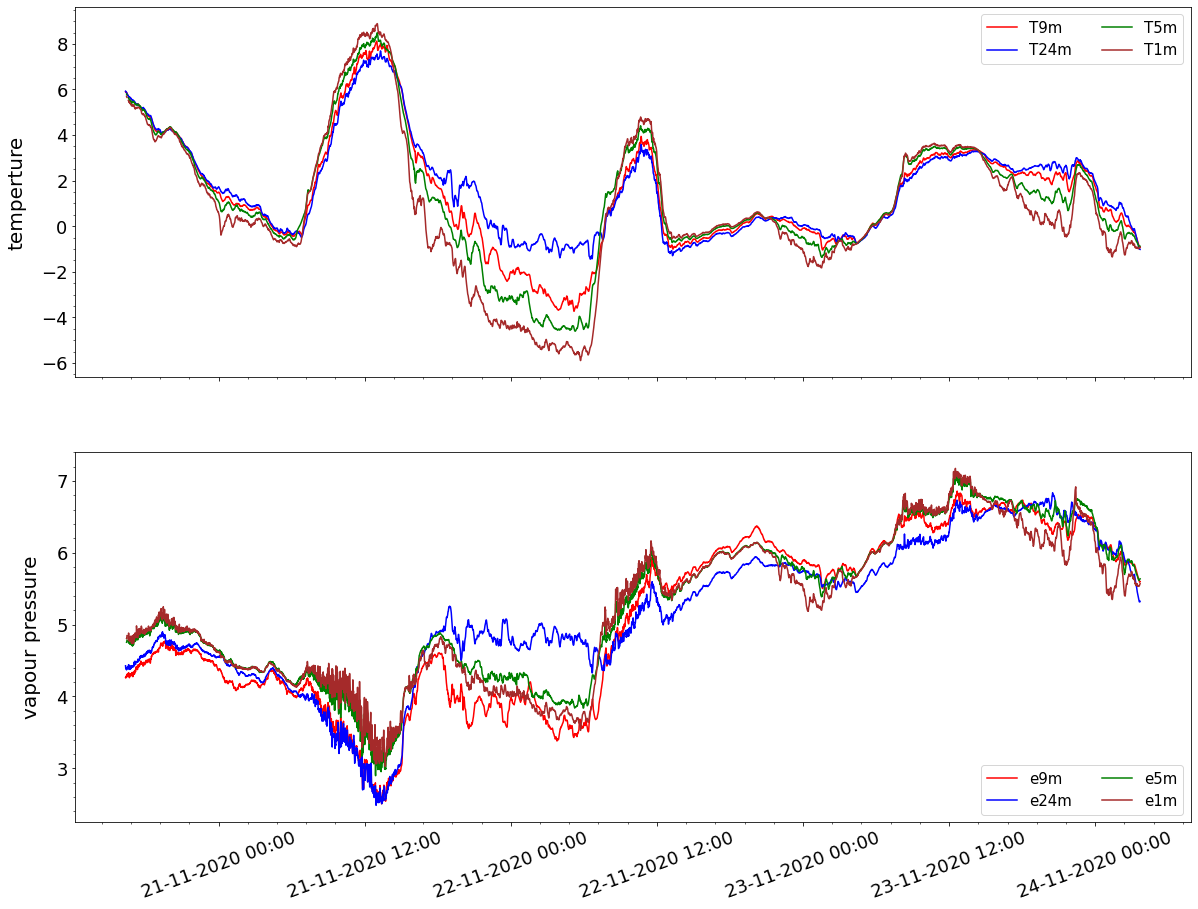

In [50]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize = (20,15),sharex= True)
     
ax1.plot(test['TIMESTAMP_UTC'][0:5000],test['temp_Avg(1)'][0:5000], label = 'T9m', color = 'red')
ax1.plot(test['TIMESTAMP_UTC'][0:5000],test['temp_Avg(2)'][0:5000], label = 'T24m', color = 'blue')
#
ax1.plot(test['TIMESTAMP_UTC'][0:5000],test['AirTC_1_Avg'][0:5000], label = 'T5m', color = 'green')
ax1.plot(test['TIMESTAMP_UTC'][0:5000],test['AirTC_2_Avg'][0:5000], label = 'T1m', color = 'brown')
#
#
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(axis='both', which='minor', labelsize=8)
ax1.tick_params(axis='x', labelrotation= 20)
 
#a1xis parameters  
ax1.legend(loc= 'upper right', prop={'size': 15}, ncol = 2)
ax1.minorticks_on()
ax1.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y %H:%M"))
ax1.set_ylabel('temperture', fontsize=20, labelpad =15 )
#
#
#second graph     
ax2.plot(test['TIMESTAMP_UTC'][0:5000],test['e_1'][0:5000], label = 'e9m', color = 'red')
ax2.plot(test['TIMESTAMP_UTC'][0:5000],test['e_2'][0:5000], label = 'e24m', color = 'blue')
#
ax2.plot(test['TIMESTAMP_UTC'][0:5000],test['e_1(1)'][0:5000], label = 'e5m', color = 'green')
ax2.plot(test['TIMESTAMP_UTC'][0:5000],test['e_2(2)'][0:5000], label = 'e1m', color = 'brown')
#
#
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='minor', labelsize=8)
ax2.tick_params(axis='x', labelrotation= 20)
 
#axis parameters  
ax2.legend(loc= 'lower right', prop={'size': 15}, ncol = 2)
ax2.minorticks_on()
ax2.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y %H:%M"))
ax2.set_ylabel('vapour pressure', fontsize=20, labelpad =15 )
#
#

(-20.0, 20.0)

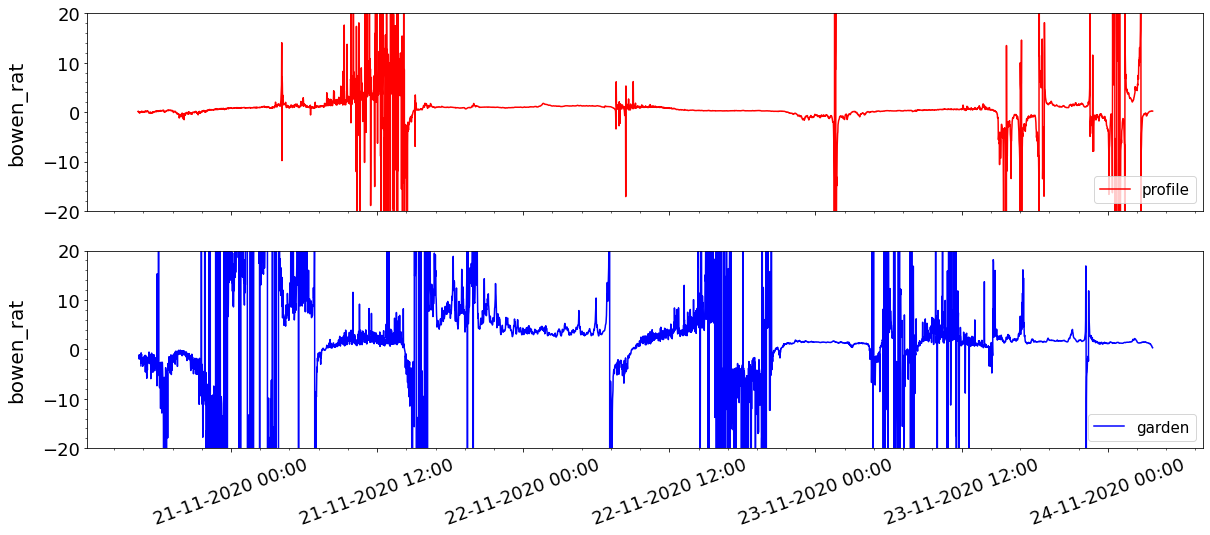

In [49]:
fig,(ax3,ax4) = plt.subplots(2,1,figsize = (20,8), sharex= True)
#third graph     
ax3.plot(test['TIMESTAMP_UTC'][0:5000],test['bow'][0:5000], label = 'profile', color = 'red')



ax3.tick_params(axis='both', which='major', labelsize=18)
ax3.tick_params(axis='both', which='minor', labelsize=8)
ax3.tick_params(axis='x', labelrotation= 20)
 
#a3is parameters  
ax3.legend(loc= 'lower right', prop={'size': 15}, ncol = 2)
ax3.minorticks_on()
ax3.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y %H:%M"))
ax3.set_ylabel('bowen_rat', fontsize=20, labelpad =15 )
ax3.set_ylim([-20,20])



ax4.plot(test['TIMESTAMP_UTC'][0:5000],test['bow(1)'][0:5000], label = 'garden', color = 'blue')
ax4.tick_params(axis='both', which='major', labelsize=18)
ax4.tick_params(axis='both', which='minor', labelsize=8)
ax4.tick_params(axis='x', labelrotation= 20)
 
#a4is parameters  
ax4.legend(loc= 'lower right', prop={'size': 15}, ncol = 2)
ax4.minorticks_on()
ax4.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y %H:%M"))
ax4.set_ylabel('bowen_rat', fontsize=20, labelpad =15 )
ax4.set_ylim([-20,20])


In [87]:
import dtale
#a = dtale.show(df_1min)
#b = dtale.show(bme_gard/en)
c = dtale.show(test)

c.open_browser()

In [39]:
df_1min.columns

Index(['TIMESTAMP', 'RECORD', 'PTemp_Avg', 'Batt_volt_Avg', 'rh_Avg(1)',
       'rh_Avg(2)', 'temp_Avg(1)', 'temp_Avg(2)', 'ws_Std(1)', 'ws_Std(2)',
       'ws_Avg(1)', 'ws_Avg(2)', 'es_1', 'es_2', 'e_1', 'e_2', 'ediff',
       'tdiff', 'bow', 'val_1', 'val_2'],
      dtype='object')